In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Reading in crypto_data.csv
df = pd.read_csv('crypto_data.csv')
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
#Drop IsTrading column
df = df.drop('IsTrading', axis=1)
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,PoW/PoS,NaN,21000000


In [4]:
#Drop rows with NULL values
df = df.dropna()
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [5]:
#Filter for cryptocurrencies that have been mined
df = df.loc[df['TotalCoinsMined'] > 0]
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [6]:
#Drop CoinName Column
df = df.drop('CoinName', axis=1)
df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000
1247,XBC,Scrypt,PoS,1.283270e+05,1000000


In [7]:
#Convert Algorithm and ProofType to numerical values
pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,XBC,1.283270e+05,1000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = df.drop('Unnamed: 0', axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [9]:
#Convert Algorithm and ProofType to numerical values
df_dummies = pd.get_dummies(data=df, columns=['Algorithm', 'ProofType'])
df_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)
scaled_data

array([[-0.11450078, -0.15072489, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.09041991, -0.14255828, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.55369883,  4.67185916, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [-0.11433426, -0.15040252, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11449785, -0.15070954, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11401032, -0.14918981, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [11]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get 90% variance data from scaled crypto data.
crypto_pca = pca.fit_transform(scaled_data)


In [12]:
crypto_pca

array([[-3.25873467e-01,  1.13989379e+00, -5.58793131e-01, ...,
        -1.65085635e-15,  1.30308155e-16, -1.08286319e-15],
       [-3.08532273e-01,  1.14012328e+00, -5.59207977e-01, ...,
        -1.32523261e-15,  2.86104068e-16, -6.78913619e-16],
       [ 2.42049045e+00,  1.71779871e+00, -6.35945634e-01, ...,
        -9.65486059e-15, -1.00152281e-14, -1.02075332e-14],
       ...,
       [-1.50690337e-01, -2.07676698e+00,  3.80761010e-01, ...,
         1.24589907e-15,  1.69505402e-15, -8.52944313e-16],
       [-2.79988707e-01,  7.92128764e-01, -2.56735735e-01, ...,
         9.67205938e-16,  9.58256036e-17, -1.00547487e-15],
       [-3.24864062e-01,  1.13985756e+00, -5.58810407e-01, ...,
        -1.38786783e-15, -5.66288140e-17, -5.77091414e-16]])

In [13]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [14]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)

In [15]:
# The dataset has 2 columns
tsne_features.shape

(577, 2)

In [16]:
df_dummies['x']= tsne_features[:,0]

# The second column of transformed features
df_dummies['y'] = tsne_features[:,1]

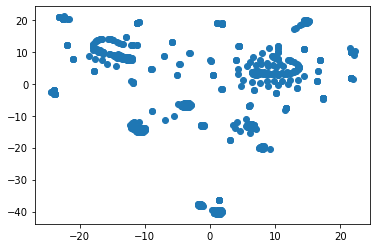

In [17]:
# Visualize the clusters
plt.scatter(df_dummies['x'], df_dummies['y'])
plt.show()

In [20]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_dummies)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,3.556458e+24
1,2,1.073044e+24
2,3,6.341515e+23
3,4,2.526132e+23
4,5,1.319122e+23


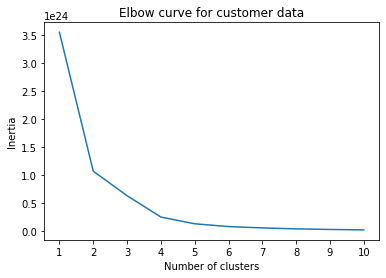

In [21]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [22]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [47]:
#Analyze clusters with best value of K
clusters = get_clusters(4, df_dummies)
clusters

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,x,y,class
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-11.954368,7.586869,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-15.303609,14.002501,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-21.620169,20.167324,3
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.236948,-40.724079,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.715412,1.759412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-17.794472,11.628533,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14.368585,19.621469,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.607319,9.991892,0
1247,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.780411,-12.952538,0


In [48]:
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

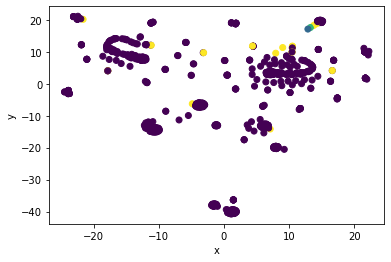

In [49]:
show_clusters(clusters)

In [50]:
# Check class value counts
clusters['class'].value_counts()

0    557
3     18
2      1
1      1
Name: class, dtype: int64